## 학습

In [5]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow import keras
from keras import models

caltech_dir = './Data/Apple_one/Train'
categories = ['BadApple', 'GoodApple','UgglyApple'] #디렉토리명
nb_classes = len(categories)

image_w = 64
image_h =64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    #라벨링 처리
    #[1,0,0] -> BadApple
    #[0.1,0] -> GoodApple
    #[0,0,1] -> UgglyApple
    
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("./Data/Numpy_data/Cnn_Apple_one_data.npy", xy) # 넘파이 파일로 저장

print("ok", len(y))

#넘파이 파일 로드 후 분리
X_train, X_test, y_train, y_test = np.load('./Data/Numpy_data/Cnn_Apple_one_data.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])
print(X_train[1:],'X_train[1:]')

## 0~255로 이루어진 데이터를 0~1사이의 값으로 정규화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

model = models.Sequential()
                                                                               #(64,64,3)
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=X_train.shape[1:],padding='same')) #공간적 계층 구조를 학습
                                                                                                            # 'same'값은 빈 값을 넣어서 입력과 출력의 크기가 같도록
model.add(MaxPooling2D(2,2)) # MaxPooling으로 지정한 kernel만큼 훑으면서 가장 큰 값만 남기는 것
model.add(Dropout(0.25)) #과적합(overfitting)을 해결
                         # 0.25확률로 일부 뉴런을 0으로 만들어서 layer에 포함된 weight 중에서 일부만 참여

model.add(Conv2D(64, kernel_size = (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(16, kernel_size = (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten()) ##Flatten 시킨다 -> 1차원 평탄화
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes, activation='softmax')) #다중 분류 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy') #다중 분류

# categorical_crossentropy
# label이 원-핫 인코딩 된 형태 즉 label이 class를 나타내는 one-hot vector를 값으로 가질 때 사용
# 예를 들어, 3-class classification 문제에서
# label이 [1, 0, 0] 또는 [0, 1, 0] 또는 [0, 0, 1]을 값으로 가질 때 사용

checkpoint = keras.callbacks.ModelCheckpoint('./model/CNN_one_16.h5', save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
                                        #patience는 기준되는 값이 연속으로 몇 번 이상 향상되지 않을 때 종료시킬 것인지를 나타낸다
                                        #restore_best_weigts -> monitor하고 있는 metric 성능이 가장 좋은 모델이 복구
history = model.fit(X_train, y_train, epochs=80,batch_size=32,
                     validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

BadApple  파일 길이 :  7922
GoodApple  파일 길이 :  12317


KeyboardInterrupt: 

## 예측


In [43]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import models

model = load_model('./Model/CNN_one.h5')

In [44]:
X_train, X_test, y_train, y_test = np.load('./Data/Numpy_data/Cnn_Apple_one_data.npy',allow_pickle=True)

In [45]:
caltech_dir = './Data/Apple_one/Test/'
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X_train)


In [49]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras import models
import numpy as np

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0


860/860 [==============================] - 25s 29ms/step


In [1]:
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    print(i[0],'i[0')
    print(i[1],'i[1]')
    print(i[2],'i[2]')
    print(pre_ans,'preans')
    if pre_ans == 0: pre_ans_str = "정상 사과"
    elif pre_ans == 1: pre_ans_str = "못난이 사과"
    else: pre_ans_str = "비정상 사과"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    cnt += 1
   



NameError: name 'prediction' is not defined

In [3]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import models
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout

model = load_model('./Model/CNN_one.h5') #모델 로드

caltech_dir = './Data/Apple_one/Test/' # 예측할 이미지파일이 저장되어있는 디렉토리 경로
image_w = 64
image_h = 64

pixels = image_h * image_w * 3
X_train, X_test, y_train, y_test = np.load('./Data/Numpy_data/Cnn_Apple_one_data.npy',allow_pickle=True)

######디렉터리에 있는 이미지를 배열에 저장
X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X_train)
######디렉터리에 있는 이미지를 배열에 저장

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "정상 사과"
    elif pre_ans == 1: pre_ans_str = "못난이 사과"
    else: pre_ans_str = "비정상 사과"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    cnt += 1
    # print(i[0],'i[0')
    # print(i[1],'i[1]')
    # print(i[2],'i[2]')
    # print(pre_ans,'preans')



860/860 [==============================] - 20s 24ms/step
[1.000 0.000 0.000]
0
해당 000002_77.jpg이미지는 정상 사과로 추정됩니다.
[1.000 0.000 0.000]
0
해당 0_09424.jpg이미지는 정상 사과로 추정됩니다.
[1.000 0.000 0.000]
0
해당 a1a51.jpg이미지는 정상 사과로 추정됩니다.
[1.000 0.000 0.000]
0


IndexError: list index out of range

In [9]:
print(y_train.mean())
print(y_test.mean())


0.3333333333333333
0.3333333333333333
138.4539938675915
138.63884923324127


In [19]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import models
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout

model = load_model('./model/CNN_one_16.h5') #모델 로드

caltech_dir = './Data/Apple_one/Test/' # 예측할 이미지파일이 저장되어있는 디렉토리 경로
image_w = 64
image_h = 64

pixels = image_h * image_w * 3
X_train, X_test, y_train, y_test = np.load('./Data/Numpy_data/Cnn_Apple_one_data.npy',allow_pickle=True)
######디렉터리에 있는 이미지를 배열에 저장
X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X_train)
######디렉터리에 있는 이미지를 배열에 저장

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

860/860 [==============================] - 18s 21ms/step


In [17]:
prediction

array([[1.000, 0.000, 0.000],
       [1.000, 0.000, 0.000],
       [0.000, 0.000, 1.000],
       ...,
       [0.000, 0.000, 1.000],
       [0.000, 1.000, 0.000],
       [0.000, 0.000, 1.000]], dtype=float32)

In [20]:
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "정상 사과"
    elif pre_ans == 1: pre_ans_str = "못난이 사과"
    else: pre_ans_str = "비정상 사과"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    cnt += 1
    # print(i[0],'i[0')
    # print(i[1],'i[1]')
    # print(i[2],'i[2]')

[1.000 0.000 0.000]
0
해당 rotated_64.jpg이미지는 정상 사과로 추정됩니다.
[1.000 0.000 0.000]
0
해당 Screen Shot 2018-06-08 at 5.26.47 PM.jpg이미지는 정상 사과로 추정됩니다.
[0.000 0.000 1.000]
2


IndexError: list index out of range

1/1 [==============================] - 0s 318ms/step
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] preds
[[[[[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   ...

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]]


  [[[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   ...

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]]


  [[[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   ...

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]]


  ...


  [[[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   ...

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]]


  [[[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    [  0]]

   [[  0]
    [  0]
    

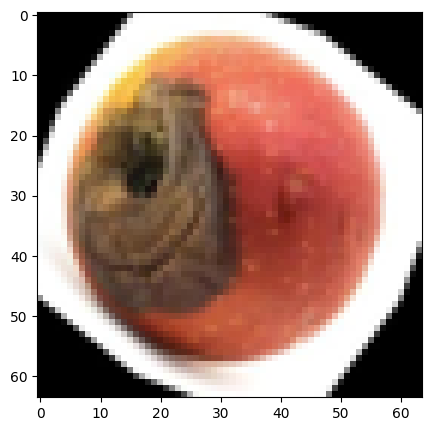

0
해당 bad.jpg 이미지는 비정상 사과입니다.


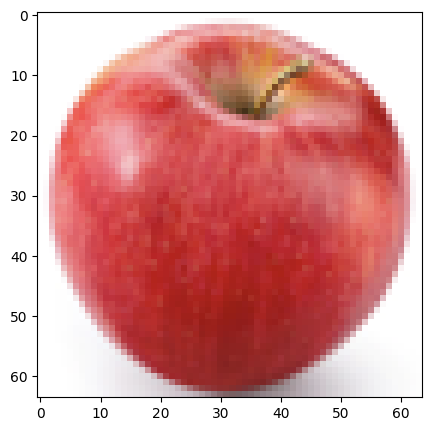

1
해당 good.jpg 이미지는 정상 사과입니다.


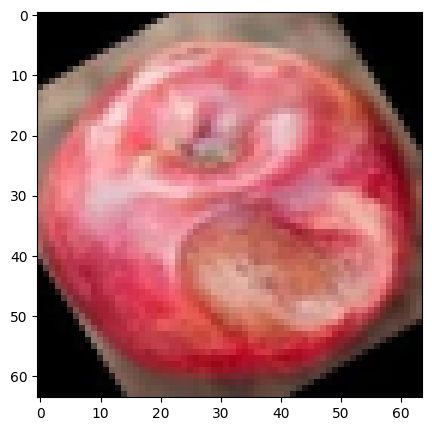

2
해당 uggly.jpg 이미지는 못난이 사과입니다.


In [10]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import models
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

model = load_model('./model/CNN_one_16.h5') #모델 로드

categories = ['BadApple', 'GoodApple','UgglyApple']

plt.rcParams['figure.figsize'] = (5, 5) # set figure size

caltech_dir = './Data/Apple_one/Test/' # 예측할 이미지파일이 저장되어있는 디렉토리 경로
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

#이미지 예측
X = []#이미지 어레이를 담을 리스트
filenames = [] # 이미지 이름을 담을 리스트

files = glob.glob(caltech_dir+"/*.*")

for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)

    filenames.append(f)
    X.append(data)


test =np.expand_dims(X, axis=4)
preds = model.predict(test)
cnt =0
print(preds,'preds')
#0 -> 비정상사고
#1 -> 정상사과
#2 -> 못난이 사과


#사진이 나오게하고
#사진에 대한 결과값
for t,i in enumerate(preds) :
    pre_ans = i.argmax()
    
    plt.imshow(X[t])
    plt.show()
    print(pre_ans)
    if pre_ans == 0 : print('해당 '+filenames[cnt].split("\\")[1]+' 이미지는 비정상 사과입니다.')
    elif pre_ans == 1 : print('해당 '+filenames[cnt].split("\\")[1]+' 이미지는 정상 사과입니다.')
    else : print('해당 '+filenames[cnt].split("\\")[1]+' 이미지는 못난이 사과입니다.')
    
    cnt += 1


In [36]:
plt.rcParams['figure.figsize'] = (5, 5) # set figure size


for i in preds:
    plt.imshow(X[i])

    plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

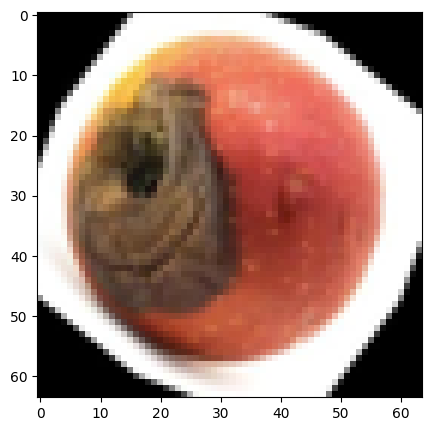

In [31]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5, 5) # set figure size



plt.imshow(X[0])

plt.show()